In [51]:
import os
import kagglehub
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [52]:
# Download latest version
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hassan\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3


In [53]:
dataset_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\robikscube\\hourly-energy-consumption\\versions\\3"

files = os.listdir(dataset_path)
print(files)


['AEP_hourly.csv', 'COMED_hourly.csv', 'DAYTON_hourly.csv', 'DEOK_hourly.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'EKPC_hourly.csv', 'est_hourly.paruqet', 'FE_hourly.csv', 'NI_hourly.csv', 'PJME_hourly.csv', 'PJMW_hourly.csv', 'pjm_hourly_est.csv', 'PJM_Load_hourly.csv']


In [54]:
file_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\robikscube\\hourly-energy-consumption\\versions\\3\\PJME_hourly.csv"

In [55]:
df = pd.read_csv(file_path)
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


Coefficients: [ 458.09294343    2.03560025  -93.0220557   -20.98310466 -610.69254861]
Intercept: 71594.36057926773


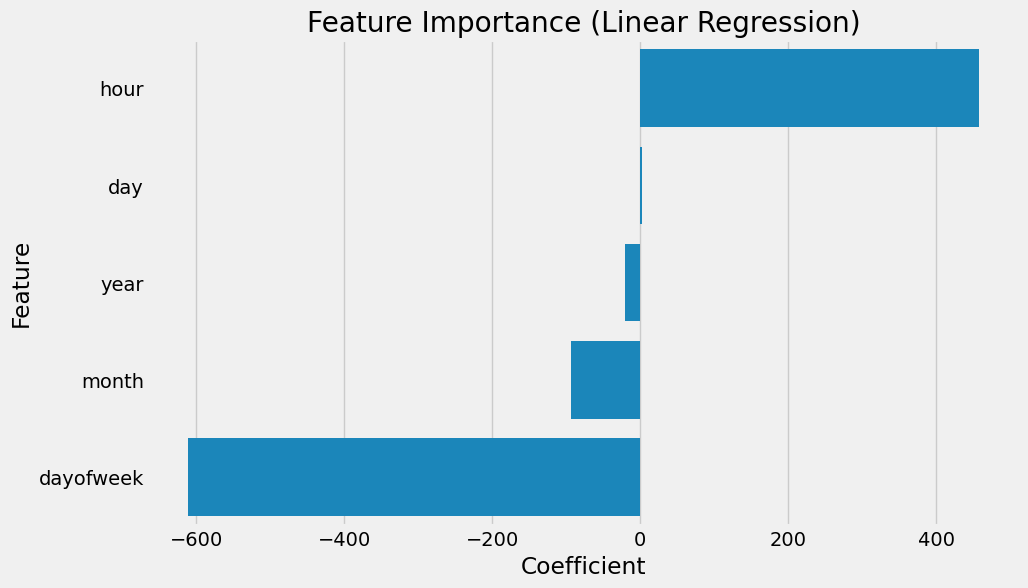

In [56]:

# Create features from the 'Datetime' index
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

# Prepare the features and target
X = df.drop(columns=['PJME_MW'])
y = df['PJME_MW']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Feature importance via correlation
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Linear Regression)')
plt.show()

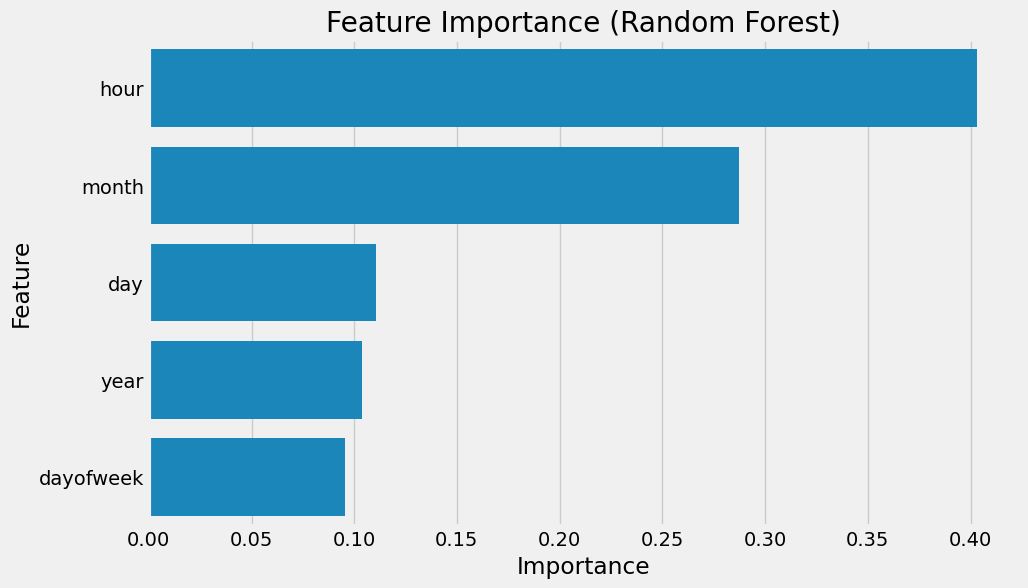


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


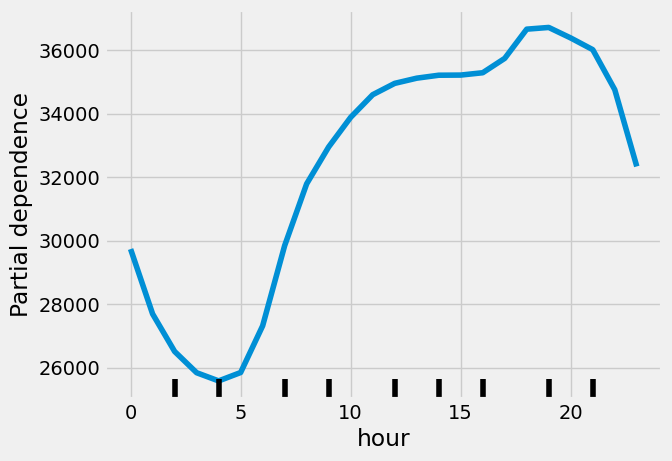

In [57]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features
PartialDependenceDisplay.from_estimator(rf, X_train, [feature_idx])
plt.show()

In [58]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy", "precision", "f1_score", "recall"])


partial_history = model.fit(X_train,
                     y_train,
                     epochs = 50,
                     batch_size=64,
                     validation_split=0.2)


Epoch 1/50


ValueError: in user code:

    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\metrics\__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\metrics\__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "c:\Users\Hassan\miniconda3\envs\tfvenv\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: precision. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
